# 电子产品销售数据分析

## 项目背景
电子产品的销售分析对于理解市场需求和优化销售策略至关重要。本项目基于某电商平台的电子产品销售数据，分析了产品类别、价格和地区的销售情况。

## 数据来源
数据包含产品的类别、价格、用户信息、销售时间以及区域信息。

## 分析内容
- 数据清理与预处理
- 按月的销售趋势分析
- 按类别的销售额分布
- 产品价格的分布情况
- 区域销售的分布情况

## 项目结构
- `data/`: 数据文件
- `notebooks/`: 包含数据分析的 Jupyter Notebook 文件
- `images/`: 存放图表和可视化图片
- `README.md`: 项目说明文件
- `report.pdf`: 分析报告（可选）

## 关键发现
我们在分析过程中生成了几个主要图表，可以将发现总结如下：

- 月度销售趋势：通过折线图显示了总销售额随月份的变化，反映了销售趋势的季节性波动。
- 按产品类别销售：展示了不同产品类别的销售额，帮助识别最畅销的类别。
- 价格分布：直方图显示了产品价格的分布情况，有助于理解价格区间的集中度。
- 区域销售分布：不同区域的销售额分布，通过柱状图显示，帮助分析各地区的销售表现。

## 未来分析方向
本项目可以进一步探索其他分析方法，如用户群体的购买偏好分析、时间序列预测等。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('电子产品销售分析.csv', encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     564169 non-null  int64  
 1   event_time     564169 non-null  object 
 2   order_id       564169 non-null  int64  
 3   product_id     564169 non-null  int64  
 4   category_id    564169 non-null  float64
 5   category_code  434799 non-null  object 
 6   brand          536945 non-null  object 
 7   price          564169 non-null  float64
 8   user_id        564169 non-null  float64
 9   age            564169 non-null  float64
 10  sex            564169 non-null  object 
 11  local          564169 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 51.7+ MB


In [5]:
df.isnull().sum()

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
dtype: int64

In [6]:
df = df.fillna(0)

In [7]:
print(df.columns)


Index(['Unnamed: 0', 'event_time', 'order_id', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'age', 'sex', 'local'],
      dtype='object')


In [8]:
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

In [9]:
df['price'] = df['price'].astype(float)

In [10]:
total_sales = df['price'].sum()
print(f"总销售额:{total_sales}")

总销售额:117499096.40000004


In [11]:
sales_by_category = df.groupby('category_code')['price'].sum()
sales_by_category

category_code
0                       9791936.04
accessories.bag           64462.96
accessories.umbrella       2239.31
apparel.costume              42.77
apparel.glove            767669.56
                           ...    
sport.trainer             62386.90
stationery.battery        18182.20
stationery.cartrige       37508.84
stationery.paper           5031.89
stationery.stapler         2911.82
Name: price, Length: 124, dtype: float64

In [12]:
sales_by_region = df.groupby('local')['price'].sum()
sales_by_region

local
上海    19837942.20
北京    19137748.75
四川     6770891.28
天津     6433736.85
广东    26013770.86
江苏     6357286.87
浙江     6522657.59
海南     6968674.41
湖北     5993820.57
湖南     6983078.88
重庆     6479488.14
Name: price, dtype: float64

In [13]:
# 去掉时区信息
df['event_time'] = df['event_time'].dt.tz_localize(None)

# 将日期转换为月份
df['month'] = df['event_time'].dt.to_period('M')


In [14]:
mothly_sales = df.groupby('month')['price'].sum()

In [15]:
mothly_sales

month
1970-01      178891.23
2020-01     1774466.94
2020-02     2267809.88
2020-03     2897486.26
2020-04     1704422.41
2020-05     7768637.79
2020-06     7691244.33
2020-07    16354029.27
2020-08    27982605.44
2020-09    17152310.57
2020-10    19765680.76
2020-11    11961511.52
Freq: M, Name: price, dtype: float64

In [16]:
plt.figure(figsize=(10, 5))
monthly_sales.plot.line(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

NameError: name 'monthly_sales' is not defined

<Figure size 1000x500 with 0 Axes>

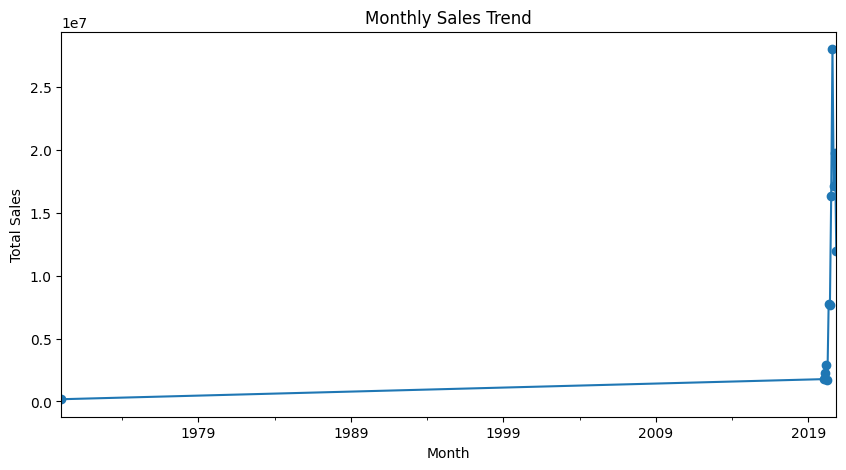

In [17]:
import matplotlib.pyplot as plt

# 确保 event_time 转换为日期格式，并按月汇总
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df['month'] = df['event_time'].dt.to_period('M')
monthly_sales = df.groupby('month')['price'].sum()

# 绘制折线图
plt.figure(figsize=(10, 5))
monthly_sales.plot.line(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [18]:
sales_by_category = df.groupby('category_code')['price'].sum()

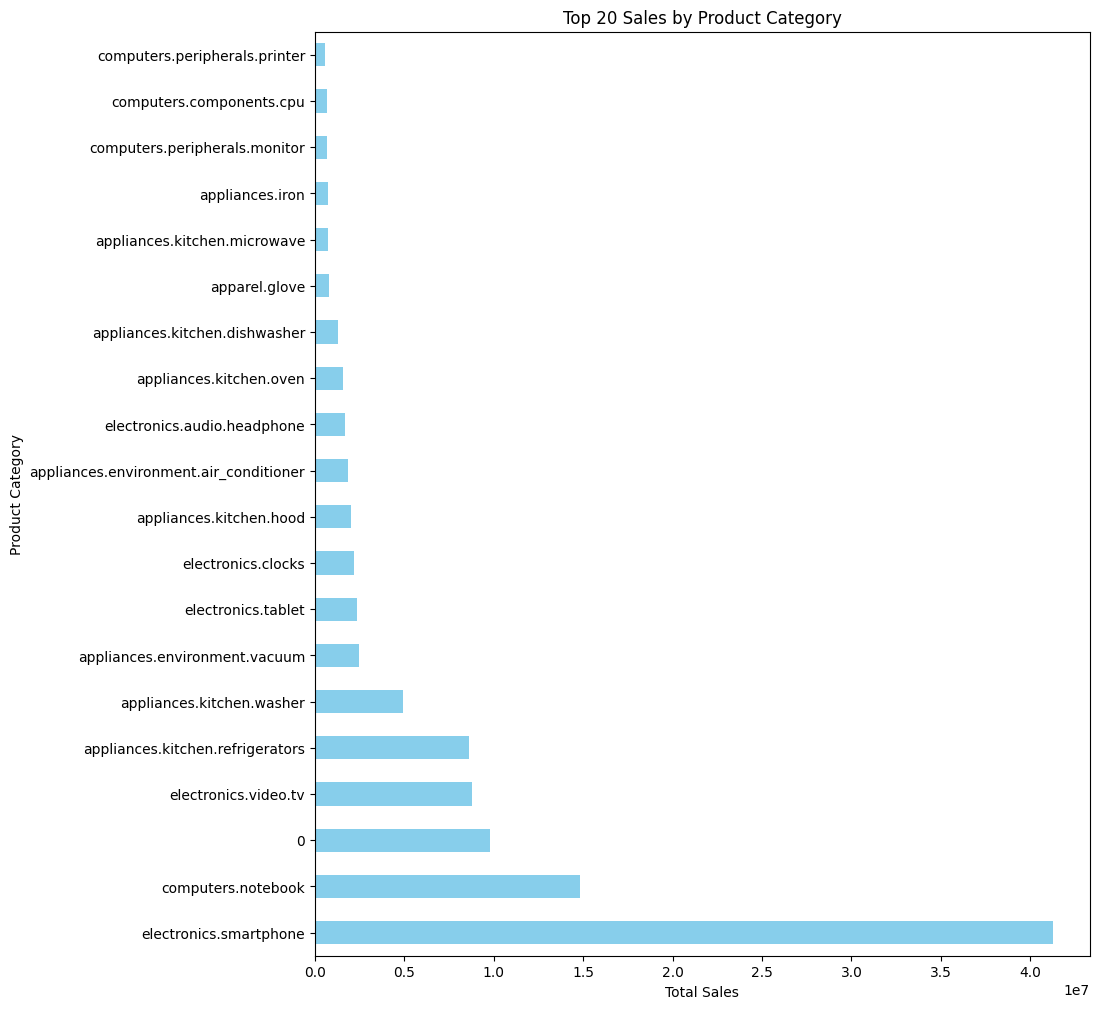

In [19]:
# 仅显示前 20 个销售额最高的类别
top_categories = sales_by_category.nlargest(20)

# 绘制水平柱状图
plt.figure(figsize=(10, 12))  # 增加图表高度
top_categories.plot(kind='barh', color='skyblue')
plt.title('Top 20 Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

In [20]:
sales_by_region = df.groupby('local')['price'].sum()

E:\Software\python\python2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Software\python\python2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Software\python\python2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Software\python\python2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Software\python\python2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22235 (\N{CJK UNIFIED IDEOGRAPH-56DB}) missing from font(s) 

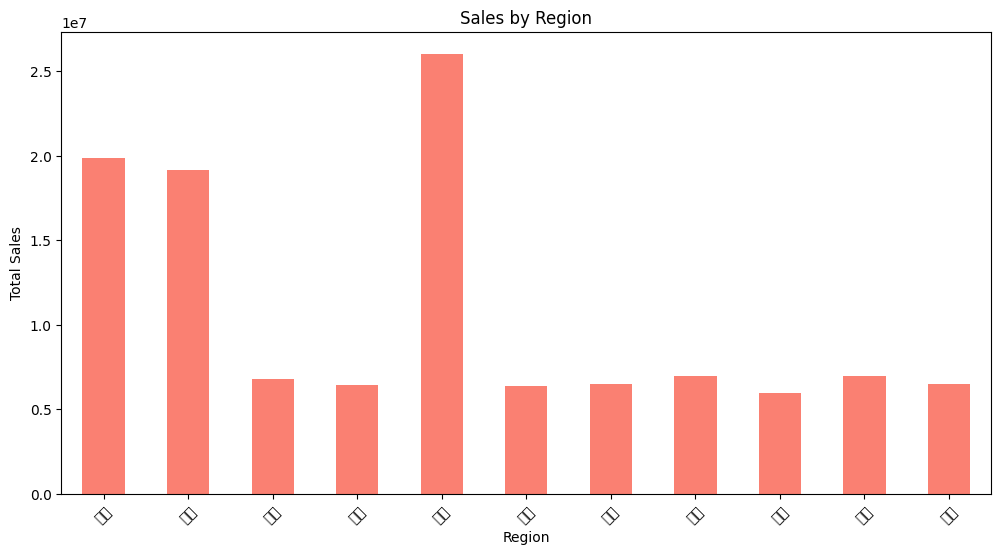

In [21]:
plt.figure(figsize=(12,6))
sales_by_region.plot(kind='bar', color= 'salmon')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

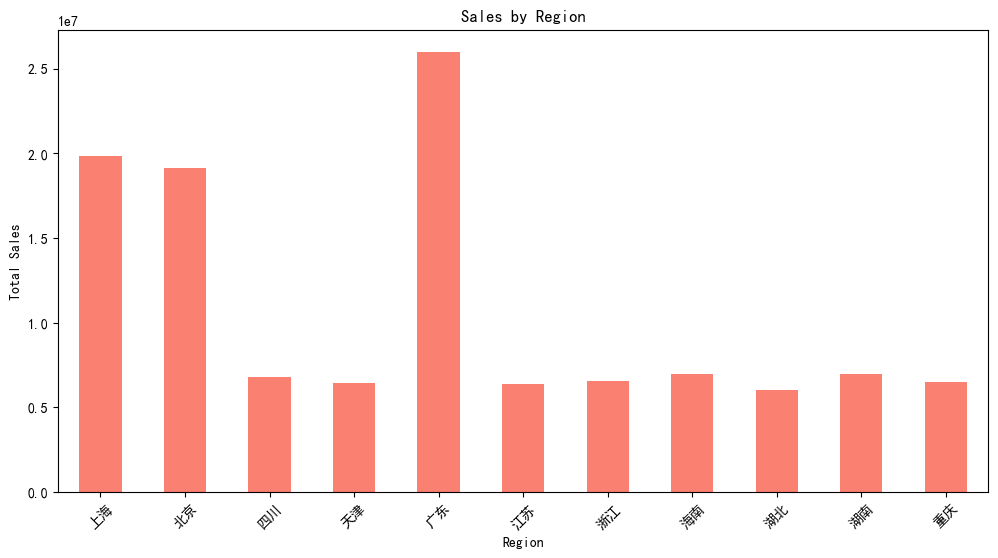

In [22]:

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 按地区汇总销售额并绘制柱状图
sales_by_region = df.groupby('local')['price'].sum()
plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='bar', color='salmon')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


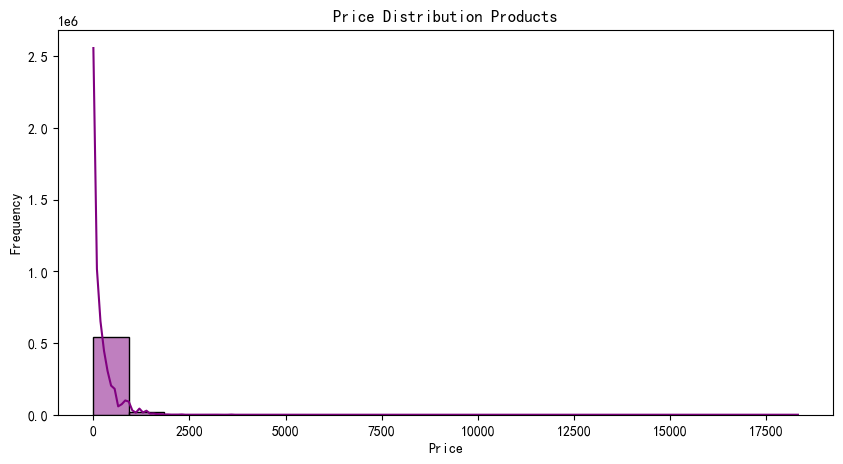

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'],bins=20, kde=True, color='purple')
plt.title('Price Distribution Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

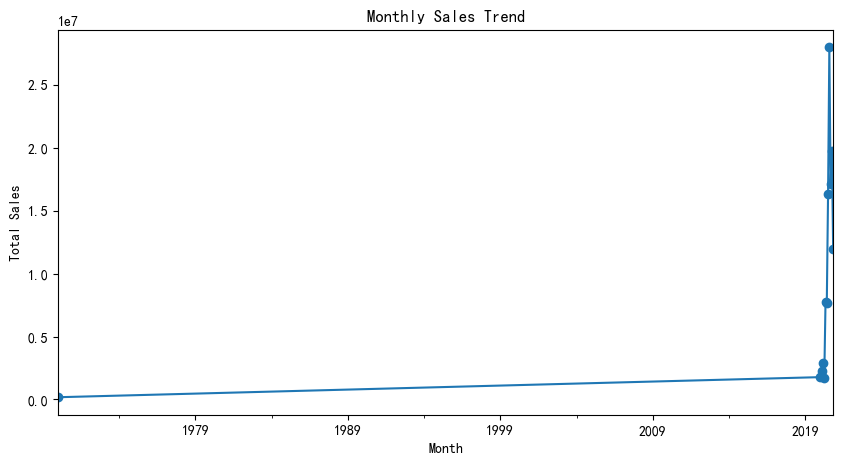

In [26]:
# 生成图表并保存
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.savefig('images/monthly_sales_trend.png')  # 保存图表
plt.show()
